In [1]:
import sys
sys.path.insert(1, "..")

In [2]:
%load_ext autoreload
%autoreload 2
%load_ext line_profiler

In [3]:
import os
import numpy as np
import numba
import matplotlib.pyplot as plt
%matplotlib inline

In [4]:
f = np.load(os.path.join("..", "tests", "daostorm_3d", "data_find", "beads.npz"))
frame = f["img"]
lm = f["local_max"]

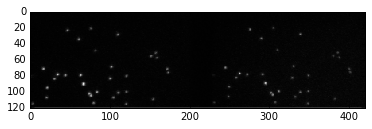

In [5]:
plt.imshow(frame, cmap="gray", interpolation="none")

In [8]:
lm[:5]

array([[  1.33856917e+03,   3.05000000e+02,   2.00000000e+00,
          2.00000000e+01,   2.00000000e+00,   2.73430832e+02,
          0.00000000e+00,   0.00000000e+00,   0.00000000e+00],
       [  1.93156917e+03,   7.60000000e+01,   2.00000000e+00,
          2.10000000e+01,   2.00000000e+00,   2.73430832e+02,
          0.00000000e+00,   0.00000000e+00,   0.00000000e+00],
       [  2.75456917e+03,   2.76000000e+02,   2.00000000e+00,
          2.20000000e+01,   2.00000000e+00,   2.73430832e+02,
          0.00000000e+00,   0.00000000e+00,   0.00000000e+00],
       [  3.34156917e+03,   4.70000000e+01,   2.00000000e+00,
          2.30000000e+01,   2.00000000e+00,   2.73430832e+02,
          0.00000000e+00,   0.00000000e+00,   0.00000000e+00],
       [  2.88056917e+03,   1.10000000e+02,   2.00000000e+00,
          2.80000000e+01,   2.00000000e+00,   2.73430832e+02,
          0.00000000e+00,   0.00000000e+00,   0.00000000e+00]])

In [13]:
import sdt.loc.daostorm_3d.feature
from sdt.loc.daostorm_3d import fit, fit_impl, fit_numba, fit_numba_impl
from storm_analysis.sa_library import _multi_fit_c
import storm_analysis.daostorm_3d

In [10]:
fit_tol = 1e-6
max_iters = 200

In [14]:
fitter = fit_impl.Fitter2DFixed(frame, lm, fit_tol)
%timeit -n 1 fitter.iterate()

1 loops, best of 3: 217 ms per loop


In [22]:
fitter_n = fit_numba_impl.Fitter2DFixed(frame, lm, fit_tol)
%timeit -n 1 fitter_n.iterate()

1 loops, best of 3: 2.1 ms per loop


In [24]:
_multi_fit_c.initialize(frame, np.zeros(frame.shape, dtype=np.int32), lm, 1e-6,
                        frame.shape[1], frame.shape[0], len(lm), 0)
%timeit -n 1 _multi_fit_c.iterate2DFixed()
_multi_fit_c.cleanup()

1 loops, best of 3: 1.56 ms per loop


In [25]:
2.1/1.56

1.3461538461538463

In [27]:
%%timeit -n 1
fitter = fit_impl.Fitter2DFixed(frame, lm, fit_tol)

1 loops, best of 3: 104 ms per loop


In [28]:
%%timeit -n 1
fitter = fit_impl.Fitter2DFixed(frame, lm, fit_tol)
fitter.fit()

1 loops, best of 3: 2.71 s per loop


In [30]:
%%timeit -n 1
fitter_n = fit_numba_impl.Fitter2DFixed(frame, lm, fit_tol)

1 loops, best of 3: 2.27 ms per loop


In [34]:
%%timeit -n 1
fitter_n = fit_numba_impl.Fitter2DFixed(frame, lm, fit_tol)
fitter_n.fit()

1 loops, best of 3: 30.1 ms per loop


In [35]:
%%timeit -n 1
_multi_fit_c.initialize(frame, np.zeros(frame.shape, dtype=np.int32), lm, 1e-6,
                        frame.shape[1], frame.shape[0], len(lm), 0)
_multi_fit_c.cleanup()

1 loops, best of 3: 1.56 ms per loop


In [37]:
%%timeit -n 1
_multi_fit_c.initialize(frame, np.zeros(frame.shape, dtype=np.int32), lm, 1e-6,
                        frame.shape[1], frame.shape[0], len(lm), 0)
for i in range(max_iters):
    _multi_fit_c.iterate2DFixed()
    if not _multi_fit_c.getUnconverged():
        break
_multi_fit_c.cleanup()

1 loops, best of 3: 20.2 ms per loop


In [38]:
(30 - 2.3)/(20 - 1.6)

1.5054347826086958

In [44]:
%timeit -n 1 sdt.loc.daostorm_3d.feature.locate(frame, 2, 300)

1 loops, best of 3: 284 ms per loop


In [45]:
%timeit -n 1 storm_analysis.daostorm_3d.locate(frame, 2, "2dfixed", 300)

1 loops, best of 3: 178 ms per loop


In [46]:
284/178

1.595505617977528